In [1]:
import math
import random
import statistics as st
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [21]:
def coin_toss():
    flip = random.randint(0,1)
    if flip == 0:
        return "Heads"
    else:
        return "Tails"
coin_toss()

'Tails'

In [27]:
def coin_toss_sim(n):
    num_heads = 0
    num_tails = 0
    coin_tosses = []
    for i in range(n):
        flip = random.randint(0,1)
        if flip == 0:
            num_heads += 1
        else:
            num_tails += 1
        if math.log2(i+1) % 1 == 0:
            coin_tosses.append((num_heads, num_tails))
    return coin_tosses

print(coin_toss_sim(2**16))

[(0, 1), (0, 2), (2, 2), (4, 4), (8, 8), (16, 16), (27, 37), (53, 75), (116, 140), (261, 251), (504, 520), (1026, 1022), (2084, 2012), (4222, 3970), (8385, 7999), (16614, 16154), (32840, 32696)]


In [28]:
def difference(tuple_list):
    diff_between_tosses = []
    for (heads,tails) in tuple_list:
        diff_between_tosses.append(abs(heads-tails))
    return diff_between_tosses
print(difference(coin_toss_sim(2**16)))
        
    
    
    
        
    

[1, 2, 0, 0, 2, 6, 6, 8, 4, 14, 46, 66, 20, 88, 166, 12, 104]


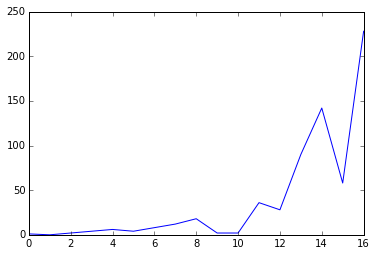

In [29]:
plt.plot(difference(coin_toss_sim(2**16)))
plt.show()

In [30]:
def heads_to_tails_ratio(tuple_list):
    ratio = []
    for (heads,tails) in tuple_list:
        ratio.append((heads/(heads+tails)))
    return ratio
print(heads_to_tails_ratio(coin_toss_sim(2**16)))

[1.0, 0.5, 0.5, 0.5, 0.4375, 0.5, 0.515625, 0.5, 0.52734375, 0.55078125, 0.5224609375, 0.5146484375, 0.5068359375, 0.5015869140625, 0.5001220703125, 0.502471923828125, 0.49981689453125]


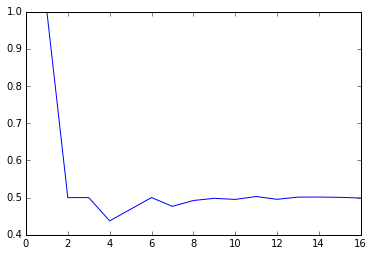

In [32]:
plt.plot(heads_to_tails_ratio(coin_toss_sim(2**16)))
plt.show()

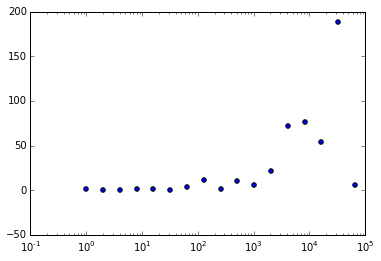

In [37]:
x_intervals = [2**0, 2**1, 2**2, 2**3, 2**4, 2**5, 2**6, 2**7, 2**8, 2**9, 2**10, 2**11, 2**12, 2**13, 2**14, 2**15, 2**16]

plt.scatter(x_intervals, difference(coin_toss_sim(2**16)))
plt.xscale('log')
plt.show()

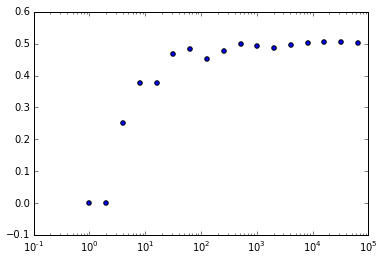

In [38]:
plt.scatter(x_intervals, heads_to_tails_ratio(coin_toss_sim(2**16)))
plt.xscale('log')
plt.show()

Not sure why values don't stay at .5 for the intervals past 1000 flips for the differences plot; must be because even though there should be a 50/50 chance of returning either heads or tails, it's possible to return one result over and over again. Other than that, in the ratio plot, it shows that regardless, the number of flips will return close to a 50% chance of heads or tails. 